# Machine Learning and Content Analytics – Mini Project

# Offensive language and hate speech detection 
---
> Students: `Arkoumani Georgia - p2822104` `Poulou Myrto - p2822129` `Koutsodimitropoulou Anastasia - p2822119` `Zaragka Eftychia - p2822112` <br />
> Professor: Haris Papageorgiou (xaris@ilsp.gr) <br />
> Assistant responsible for this assignment: George Perakis (gperakis@aueb.gr) <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> Date: 28/08/2022



*   Import all the required libraries and install packages



In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv
from google.colab import files
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pylab as py
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, wordpunct_tokenize

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

import warnings
# Ignore future warning in order not to interrupt the flow
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


* Install a list of datasets from hugginface.co

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


*   Import and load the required datasets for the analysis




## Berkeley Dataset

In [ ]:
import datasets
from datasets import load_dataset
berkeley_df_init = datasets.load_dataset('ucberkeley-dlab/measuring-hate-speech', 'binary') # Load dataset from https://huggingface.co/datasets
berkeley_df_init = berkeley_df_init['train'].to_pandas() # Convert dataset into a dataframe
berkeley_df_init.describe() # Show basic statistics

Using custom data configuration ucberkeley-dlab--measuring-hate-speech-aea626f3e087c844


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/ucberkeley-dlab___parquet/ucberkeley-dlab--measuring-hate-speech-aea626f3e087c844/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,hatespeech,hate_speech_score,infitms,outfitms,annotator_severity,std_err,annotator_infitms,annotator_outfitms,hypothesis,annotator_age
count,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.00000,135556.000000,135556.000000,135556.000000,135556.000000,...,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135451.000000
mean,23530.416138,5567.097812,1.281352,2.954307,2.828875,2.56331,2.278638,2.698575,1.846211,1.052045,...,0.744733,-0.567428,1.034322,1.001052,-0.018817,0.300588,1.007158,1.011841,0.014589,37.910772
std,12387.194125,3230.508937,1.023542,1.231552,1.309548,1.38983,1.370876,0.898500,1.402372,1.345706,...,0.932260,2.380003,0.496867,0.791943,0.487261,0.236380,0.269876,0.675863,0.613006,11.641276
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.340000,0.100000,0.070000,-1.820000,0.020000,0.390000,0.280000,-1.578693,18.000000
25%,18148.000000,2719.000000,0.000000,2.000000,2.000000,2.00000,1.000000,2.000000,1.000000,0.000000,...,0.000000,-2.330000,0.710000,0.560000,-0.380000,0.030000,0.810000,0.670000,-0.341008,29.000000
50%,20052.000000,5602.500000,1.000000,3.000000,3.000000,3.00000,3.000000,3.000000,2.000000,0.000000,...,0.000000,-0.340000,0.960000,0.830000,-0.020000,0.340000,0.970000,0.850000,0.110405,35.000000
75%,32038.250000,8363.000000,2.000000,4.000000,4.000000,4.00000,3.000000,3.000000,3.000000,2.000000,...,2.000000,1.410000,1.300000,1.220000,0.350000,0.420000,1.170000,1.130000,0.449555,45.000000
max,50070.000000,11142.000000,3.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,...,2.000000,6.300000,5.900000,9.000000,1.360000,1.900000,2.010000,9.000000,0.987511,81.000000


In [ ]:
berkeley_df_init.head(10) # Show the first 10 records of the dataset

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,47777,10873,3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,39773,2790,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,47101,3379,3,4.0,4.0,4.0,4.0,4.0,4.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,43625,7365,3,2.0,3.0,2.0,1.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,12538,488,0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,True,False
5,11001,527,0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False
6,13168,3275,0,4.0,4.0,4.0,4.0,3.0,3.0,0.0,...,False,False,False,False,False,False,False,False,True,False
7,17034,6801,0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
8,40171,10363,3,4.0,4.0,4.0,3.0,3.0,3.0,0.0,...,False,False,False,False,False,False,False,False,True,False
9,1006,10615,0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
berkeley_df_init.columns # Show the columns of the dataset

Index(['comment_id', 'annotator_id', 'platform', 'sentiment', 'respect',
       'insult', 'humiliate', 'status', 'dehumanize', 'violence',
       ...
       'annotator_religion_hindu', 'annotator_religion_jewish',
       'annotator_religion_mormon', 'annotator_religion_muslim',
       'annotator_religion_nothing', 'annotator_religion_other',
       'annotator_sexuality_bisexual', 'annotator_sexuality_gay',
       'annotator_sexuality_straight', 'annotator_sexuality_other'],
      dtype='object', length=131)

In [ ]:
berkeley_df_init.shape # Dimensionality of the dataset

(135556, 131)

In [ ]:
berkeley_df_init.info() # Basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135556 entries, 0 to 135555
Columns: 131 entries, comment_id to annotator_sexuality_other
dtypes: bool(103), float64(19), int32(2), int8(1), object(6)
memory usage: 40.3+ MB


In [ ]:
berkeley_df_init.select_dtypes('object') # Display columns of type object

,text,annotator_gender,annotator_trans,annotator_educ,annotator_income,annotator_ideology
0,Yes indeed. She sort of reminds me of the elde...,male,no,college_grad_ba,<10k,neutral
1,The trans women reading this tweet right now i...,female,no,some_college,<10k,neutral
2,Question: These 4 broads who criticize America...,male,no,some_college,100k-200k,slightly_conservative
3,It is about time for all illegals to go back t...,male,no,high_school_grad,10k-50k,neutral
4,For starters bend over the one in pink and kic...,female,no,masters,10k-50k,neutral
...,...,...,...,...,...,...
135551,عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي نص...,female,no,college_grad_aa,10k-50k,no_opinion
135552,Millions of #Yemen-is participated in mass ral...,female,no,college_grad_ba,10k-50k,extremely_liberal
135553,@AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...,female,no,some_college,10k-50k,liberal
135554,Millions of #Yemen-is participated in mass ral...,male,no,college_grad_aa,10k-50k,conservative


* Copy from the initial dataframe the columns that contribute to the analysis

In [ ]:
berkeley_df = berkeley_df_init[['insult','humiliate', 'dehumanize',	'violence',	'genocide',	'attack_defend',	'hatespeech', 'text']].copy() # Copy of the initial dataframe
berkeley_df

,insult,humiliate,dehumanize,violence,genocide,attack_defend,hatespeech,text
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes indeed. She sort of reminds me of the elde...
1,0.0,0.0,0.0,0.0,0.0,2.0,0.0,The trans women reading this tweet right now i...
2,4.0,4.0,4.0,0.0,0.0,4.0,2.0,Question: These 4 broads who criticize America...
3,2.0,1.0,0.0,0.0,0.0,3.0,0.0,It is about time for all illegals to go back t...
4,4.0,4.0,4.0,4.0,1.0,3.0,2.0,For starters bend over the one in pink and kic...
...,...,...,...,...,...,...,...,...
135551,0.0,0.0,0.0,0.0,0.0,2.0,0.0,عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي نص...
135552,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Millions of #Yemen-is participated in mass ral...
135553,1.0,1.0,0.0,0.0,0.0,1.0,0.0,@AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...
135554,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Millions of #Yemen-is participated in mass ral...


* Create function that categorizes types of hate/offensive comments

In [ ]:
def categorize_types(berkeley_df):
  if (berkeley_df['insult'] == 0) & (berkeley_df['humiliate'] == 0) & (berkeley_df['dehumanize'] == 0) & (berkeley_df['violence'] == 0) & (berkeley_df['genocide'] == 0) & (berkeley_df['attack_defend'] == 0) & (berkeley_df['hatespeech'] == 0):
    return 0 # No hate comment
  elif (berkeley_df['insult'] == 4) & (berkeley_df['humiliate'] == 4) & (berkeley_df['dehumanize'] == 4) & (berkeley_df['violence'] == 4) & (berkeley_df['genocide'] == 4) & (berkeley_df['attack_defend'] == 4) & (berkeley_df['hatespeech'] == 2):
    return 1 # Hate comment
  else:
    return np.nan


In [ ]:
berkeley_df['category'] = berkeley_df.apply(categorize_types, axis = 1) # Apply categorize_types function in column category

In [ ]:
berkeley_df=berkeley_df.dropna() # Drop NA values
berkeley_df

,insult,humiliate,dehumanize,violence,genocide,attack_defend,hatespeech,text,category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes indeed. She sort of reminds me of the elde...,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ladies buy a gun learn how to use it effective...,0.0
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,You are an amazing dad! Don't forget that girl...,0.0
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,@Ali Delon Love Turkey and brave Turks from In...,0.0
118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Here's the thing, there is only one person on ...",0.0
...,...,...,...,...,...,...,...,...,...
135527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Please help support nonbinary pride, add a #Tw...",0.0
135529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Please help support nonbinary pride, add a #Tw...",0.0
135534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,I've always been proud of the Igbo tribe and o...,0.0
135539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trans rights are human rights,0.0


* Create function that that matches 0 (Not Offensive/Hate Speech) or 1(Offensive/Hate Speech) in category column.

In [ ]:
# If category = 1 return Offensive/Hate Speech and if category = 0 return Not Offensive/Hate Speech
def categorize_berkley(category):
  if category == 1:
    return 1 # Offensive/Hate Speech
  elif category == 0:
    return 0 # Not Offensive/Hate Speech
# Apply the above function in category column
berkeley_df['category'] = berkeley_df['category'].apply(lambda x: categorize_berkley(x))
# Rename column text
berkeley_df = berkeley_df.rename(columns= {'text': 'comment'})
# Keep only the necessary columns
berkeley_df = berkeley_df[['comment', 'category']]
# Show the first 10 records of the dataset
berkeley_df.head(10)

,comment,category
0,Yes indeed. She sort of reminds me of the elde...,0
15,Ladies buy a gun learn how to use it effective...,0
34,You are an amazing dad! Don't forget that girl...,0
70,@Ali Delon Love Turkey and brave Turks from In...,0
118,"Here's the thing, there is only one person on ...",0
128,Hey there!! Due to my college transiconnotch b...,0
147,All children should be respected in schools. E...,0
164,"> I think you're a bit confused. If you're ""an...",0
188,It's not your decision. If a woman doesn't wan...,0
204,"""We oppose any restriction to human services a...",0


* Display the imbalance of the two categories using countplot

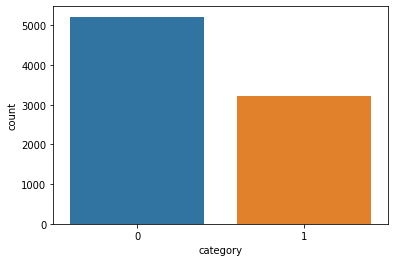

In [ ]:
sns.countplot(berkeley_df.category)

## ETHOS Dataset

In [ ]:
from datasets import load_dataset
df_ethos_init = load_dataset('ethos', 'binary') # Load dataset from https://huggingface.co/datasets
df_ethos_final = df_ethos_init['train'].to_pandas() # Convert dataset into a dataframe
df_ethos_final

  0%|          | 0/1 [00:00<?, ?it/s]

,text,label
0,You should know women's sports are a joke,1
1,You look like Sloth with deeper Down’s syndrome,1
2,You look like Russian and speak like Indian. B...,1
3,"Women deserve to be abused, I guess.",1
4,Women are made for making babies and cooking d...,1
...,...,...
993,From the midnight sun where the hot springs blow,0
994,Don't say I'm not your type,0
995,And therefore never send to know for whom the...,0
996,And I can't stand another day,0


In [ ]:
df_ethos_final.rename(columns= {'text': 'comment', 'label': 'category'}, inplace = True) # Rename columns text and label

In [ ]:
df_ethos_final.describe() # Show basic statistics

,category
count,998
mean,0
std,0
min,0
25%,0
50%,0
75%,1
max,1


In [ ]:
df_ethos_final.info() # Basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comment   998 non-null    object
 1   category  998 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [ ]:
df_ethos_final.shape # Dimensionality of the dataset

(998, 2)

* Display the imbalance of the two categories using countplot

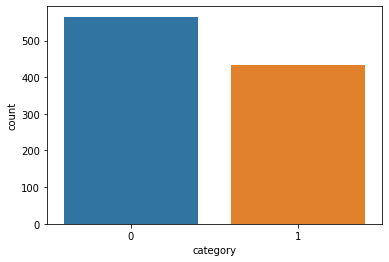

In [ ]:
sns.countplot(df_ethos_final.category) # Basic info of the dataset

## ICWSM18 Dataset

In [ ]:
from google.colab import files
uploaded = files.upload() # Upload dataset xlsx local file from GitHub (official source: https://www.icwsm.org/2018/datasets/datasets/)

Saving ICWSM18.xlsx to ICWSM18.xlsx


In [ ]:
ICWSM18_df = pd.read_excel('ICWSM18.xlsx') # Read the dataset
ICWSM18_df

,ID,title,type,message,Class,Sub 1,Sub 2,Sub 3,Sub 4,Sub 5
0,22838,Virginia Police Pepper-Sprayed A Man Having A ...,video,this is disgusting and heartbreaking. they sho...,Hateful,Towards law enforcement,NaN,NaN,NaN,NaN
1,53074,Delaware Police Officer Re-Indicted For Brutal...,video,Fuck that cop. Nothing but a fucking thug. \n\...,Hateful,Towards law enforcement,NaN,NaN,NaN,NaN
2,85387,Laquan McDonald Murder Covered Up By Chicago P...,video,"Fucking piece of shit cops, protect and serve ...",Hateful,Towards law enforcement,NaN,NaN,NaN,NaN
3,92351,Alabama Police Paralyze Grandfather From India...,video,Land of the free... My fucking ass. America is...,Hateful,Towards law enforcement,Accusations,NaN,NaN,NaN
4,96952,Man Killed By Taser,video,These fucking cops are out of control!,Hateful,Towards law enforcement,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3217,205424,This is what it's like to be deported under Pr...,post,Same with every President. It's in the spotlig...,Neutral,NaN,NaN,NaN,NaN,NaN
3218,205426,This is what it's like to be deported under Pr...,post,"This is sad, I only wish that the illegal immi...",Neutral,NaN,NaN,NaN,NaN,NaN
3219,205427,This is what it's like to be deported under Pr...,post,I don't feel bad for the guy that was here for...,Neutral,NaN,NaN,NaN,NaN,NaN
3220,205429,This is what it's like to be deported under Pr...,post,Who feels bad about a person who got caught wi...,Neutral,NaN,NaN,NaN,NaN,NaN


In [ ]:
ICWSM18_df = ICWSM18_df.drop(columns=['ID', 'title', 'type','Sub 1','Sub 2','Sub 3','Sub 4','Sub 5']) # Drop unnecessary columns
ICWSM18_df

,message,Class
0,this is disgusting and heartbreaking. they sho...,Hateful
1,Fuck that cop. Nothing but a fucking thug. \n\...,Hateful
2,"Fucking piece of shit cops, protect and serve ...",Hateful
3,Land of the free... My fucking ass. America is...,Hateful
4,These fucking cops are out of control!,Hateful
...,...,...
3217,Same with every President. It's in the spotlig...,Neutral
3218,"This is sad, I only wish that the illegal immi...",Neutral
3219,I don't feel bad for the guy that was here for...,Neutral
3220,Who feels bad about a person who got caught wi...,Neutral


In [ ]:
ICWSM18_df.rename(columns = {'message':'comment', 'Class':'category'}, inplace = True) # Rename columns message and Class
ICWSM18_df

,comment,category
0,this is disgusting and heartbreaking. they sho...,Hateful
1,Fuck that cop. Nothing but a fucking thug. \n\...,Hateful
2,"Fucking piece of shit cops, protect and serve ...",Hateful
3,Land of the free... My fucking ass. America is...,Hateful
4,These fucking cops are out of control!,Hateful
...,...,...
3217,Same with every President. It's in the spotlig...,Neutral
3218,"This is sad, I only wish that the illegal immi...",Neutral
3219,I don't feel bad for the guy that was here for...,Neutral
3220,Who feels bad about a person who got caught wi...,Neutral


In [ ]:
ICWSM18_df.describe() # Show basic statistics

,comment,category
count,3221,3222
unique,3213,2
top,Chicago,Hateful
freq,3,2364


In [ ]:
ICWSM18_df.info() # Basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comment   3221 non-null   object
 1   category  3222 non-null   object
dtypes: object(2)
memory usage: 50.5+ KB


In [ ]:
ICWSM18_df.shape # Dimensionality of the dataset

(3222, 2)

* Create function that categorizes types of hate/offensive comments

In [ ]:
# If category = Hateful return 1:Offensive/Hate Speech else return 0:Not Offensive/Hate Speech
def categorize_icwsm18(category):
  if category == 'Hateful':
    return 1 # Hate comment
  else:
    return 0 # No hate comment
# Apply the above function in category column
ICWSM18_df['category'] = ICWSM18_df['category'].apply(lambda x: categorize_icwsm18(x))
# Show the first 10 records of the dataset
ICWSM18_df.head(10)

,comment,category
0,this is disgusting and heartbreaking. they sho...,1
1,Fuck that cop. Nothing but a fucking thug. \n\...,1
2,"Fucking piece of shit cops, protect and serve ...",1
3,Land of the free... My fucking ass. America is...,1
4,These fucking cops are out of control!,1
5,cops like these are the biggest pussies. as a ...,1
6,People should just group up and jump these fuc...,1
7,Of course cops couldn't make it before the rob...,1
8,"The cop's a pig, but I wouldn't mind him body ...",1
9,I hope that piece of shit gets at east 3 years...,1


In [ ]:
ICWSM18_df.describe() # Show basic statistics

,category
count,3222.000000
mean,0.733706
std,0.442089
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


* Display the imbalance of the two categories using countplot

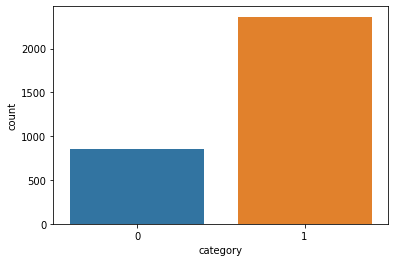

In [ ]:
sns.countplot(ICWSM18_df.category)

## All-in-One Jigsaw Dataset

In [ ]:
from google.colab import files
uploaded = files.upload() # Upload local zip file (for performance reasons) from the Kaggle dataset (https://www.kaggle.com/code/adldotori/all-in-one-dataset/data)

Saving all_in_one_jigsaw.zip to all_in_one_jigsaw.zip


In [ ]:
!unzip "all_in_one_jigsaw.zip" # Unzip the file

Archive:  all_in_one_jigsaw.zip
  inflating: all_in_one_jigsaw.csv   




In [ ]:
jigsaw_df = pd.read_csv('all_in_one_jigsaw.csv') # Read the dataset
jigsaw_df.head(10) # Show the first 10 records of the dataset

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,dataset,comment_text_processed
0,0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0,toxic_comment,explanation why the edits made under my userna...
1,1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0,toxic_comment,d'aww he matches this background colour i'm se...
2,2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0,toxic_comment,hey man i'm really not trying to edit war it's...
3,3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0,toxic_comment,more i can't make any real suggestions on impr...
4,4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0,toxic_comment,you sir are my hero any chance you remember wh...
5,5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0.0,0.0,0.0,0.0,0.0,0.0,toxic_comment,congratulations from me as well use the tools ...
6,6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1.0,1.0,1.0,0.0,1.0,0.0,toxic_comment,cock suck before you piss around on my work
7,7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0.0,0.0,0.0,0.0,0.0,0.0,toxic_comment,your vandalism to the matt shirvington article...
8,8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0.0,0.0,0.0,0.0,0.0,0.0,toxic_comment,sorry if the word 'nonsense' was offensive to ...
9,9,00040093b2687caa,alignment on this subject and which are contra...,0.0,0.0,0.0,0.0,0.0,0.0,toxic_comment,alignment on this subject and which are contra...


In [ ]:
jigsaw_df.describe() # Show basic statistics

,Unnamed: 0,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,2.223065e+06,2.223065e+06,2.223065e+06,2.223065e+06,2.223065e+06,2.223065e+06,2.223065e+06
mean,9.071514e+05,1.021933e-01,5.002512e-03,1.795457e-02,8.657584e-03,7.806368e-02,2.123378e-02
std,6.136641e+05,2.088633e-01,3.669255e-02,9.525246e-02,5.001892e-02,1.811210e-01,8.066601e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.322170e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.879830e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.443749e+06,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.999515e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
jigsaw_df.info() # Basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223065 entries, 0 to 2223064
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   id                      object 
 2   comment_text            object 
 3   toxic                   float64
 4   severe_toxic            float64
 5   obscene                 float64
 6   threat                  float64
 7   insult                  float64
 8   identity_hate           float64
 9   dataset                 object 
 10  comment_text_processed  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 186.6+ MB


In [ ]:
jigsaw_df.shape # Dimensionality of the dataset

(2223065, 11)

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format # Format the float values in order to convert them into integers below
jigsaw_df

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,dataset,comment_text_processed
0,0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,toxic_comment,explanation why the edits made under my userna...
1,1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,toxic_comment,d'aww he matches this background colour i'm se...
2,2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,toxic_comment,hey man i'm really not trying to edit war it's...
3,3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,toxic_comment,more i can't make any real suggestions on impr...
4,4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,toxic_comment,you sir are my hero any chance you remember wh...
...,...,...,...,...,...,...,...,...,...,...,...
2223060,1999511,1018736,Another man shamming article. If white men did...,0,0,0,0,0,0,unintended,another man shamming article if white men did ...
2223061,1999512,340016,"""no matter what is put in front of you regardi...",0,0,0,0,0,0,unintended,no matter what is put in front of you regardin...
2223062,1999513,919629,The Democrat party aided and abetted by it's M...,0,0,0,0,0,0,unintended,the democrat party aided and abetted by it's m...
2223063,1999514,5165492,I just don't find her a very good representati...,0,0,0,0,0,0,unintended,i just don't find her a very good representati...


In [ ]:
# Tranform the columns into numeric 
jigsaw_df["insult"] = jigsaw_df['insult'].astype(int)
jigsaw_df["toxic"] = jigsaw_df['toxic'].astype(int)
jigsaw_df["severe_toxic"] = jigsaw_df['severe_toxic'].astype(int)
jigsaw_df["obscene"] = jigsaw_df['obscene'].astype(int)
jigsaw_df["threat"] = jigsaw_df['threat'].astype(int)
jigsaw_df["identity_hate"] = jigsaw_df['identity_hate'].astype(int)

* Display the imbalance of the two categories using countplot

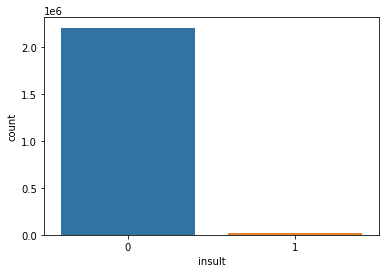

In [ ]:
sns.countplot(jigsaw_df.insult)

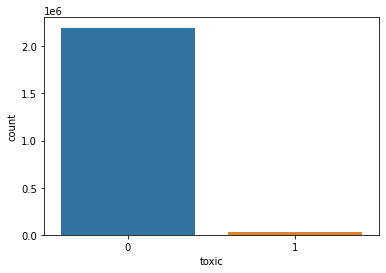

In [ ]:
sns.countplot(jigsaw_df.toxic)

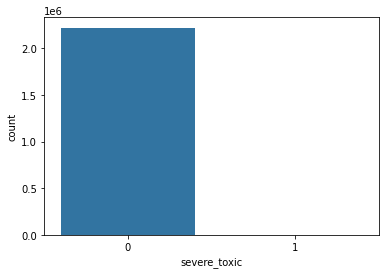

In [ ]:
sns.countplot(jigsaw_df.severe_toxic)

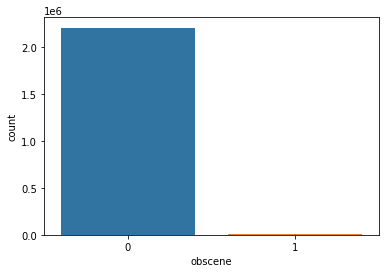

In [ ]:
sns.countplot(jigsaw_df.obscene)

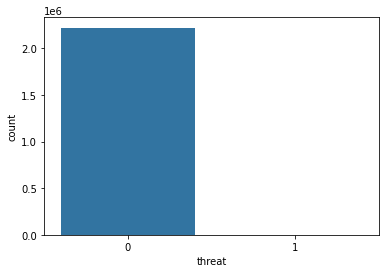

In [ ]:
sns.countplot(jigsaw_df.threat)

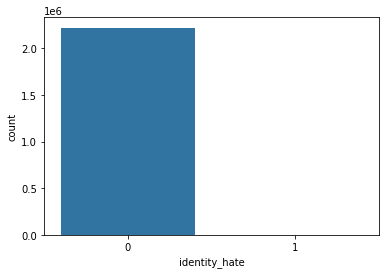

In [ ]:
sns.countplot(jigsaw_df.identity_hate)

In [ ]:
columns_list = [jigsaw_df.insult, jigsaw_df.obscene,jigsaw_df.identity_hate,jigsaw_df.toxic, jigsaw_df.severe_toxic, jigsaw_df.threat] # Display a list of the columns

In [ ]:
jigsaw_df = jigsaw_df.drop(columns=['Unnamed: 0']) # Drop unnessary column 

In [ ]:
jigsaw_df.info() # Basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223065 entries, 0 to 2223064
Data columns (total 10 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   id                      object
 1   comment_text            object
 2   toxic                   int64 
 3   severe_toxic            int64 
 4   obscene                 int64 
 5   threat                  int64 
 6   insult                  int64 
 7   identity_hate           int64 
 8   dataset                 object
 9   comment_text_processed  object
dtypes: int64(6), object(4)
memory usage: 169.6+ MB


In [ ]:
jigsaw_df['category_sum'] = jigsaw_df.sum(axis=1) # Create column category_sum that stores the sum of hate comments type

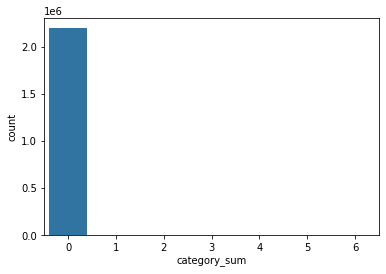

In [ ]:
sns.countplot(jigsaw_df.category_sum) # Countplot for the category_sum column

* Create function that categorizes types of hate/offensive comments

In [ ]:
# If category_sum > 0 return 1:Offensive/Hate Speech and if category_sum = 0 return 0:Not Offensive/Hate Speech
def categorize_jigsaw(category_sum):
  if category_sum > 0:
    return 1 # Offensive/Hate Speech
  elif category_sum == 0:
    return 0 # Not Offensive/Hate Speech 
# Apply the above function in category column
jigsaw_df['category'] = jigsaw_df['category_sum'].apply(lambda x: categorize_jigsaw(x))
# Rename column comment_text_processed
jigsaw_df = jigsaw_df.rename(columns= {'comment_text_processed': 'comment'})
# Keep only the necessary columns
jigsaw_df = jigsaw_df[['comment', 'category']]
# Show the first 10 records of the dataset
jigsaw_df.head(10)

,comment,category
0,explanation why the edits made under my userna...,0
1,d'aww he matches this background colour i'm se...,0
2,hey man i'm really not trying to edit war it's...,0
3,more i can't make any real suggestions on impr...,0
4,you sir are my hero any chance you remember wh...,0
5,congratulations from me as well use the tools ...,0
6,cock suck before you piss around on my work,1
7,your vandalism to the matt shirvington article...,0
8,sorry if the word 'nonsense' was offensive to ...,0
9,alignment on this subject and which are contra...,0


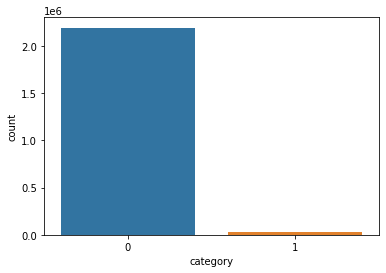

In [ ]:
sns.countplot(jigsaw_df.category) # Countplot for the category column

## Davidson Dataset

In [ ]:
from datasets import load_dataset
davidson_df = load_dataset("hate_speech_offensive") # Load dataset from https://huggingface.co/datasets
davidson_df = davidson_df['train'].to_pandas() # Convert dataset into a dataframe
davidson_df.head(10) # Show the first 10 records of the dataset 

Using custom data configuration default


Generating train split:   0%|          | 0/24783 [00:00<?, ? examples/s]

Dataset hate_speech_offensive downloaded and prepared to /root/.cache/huggingface/datasets/hate_speech_offensive/default/1.0.0/5f5dfc7b42b5c650fe30a8c49df90b7dbb9c7a4b3fe43ae2e66fabfea35113f5. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


* Create function that categorizes types of hate/offensive comments

In [ ]:
# If class = 0 or 1 return 0: Not Offensive/Hate Speech and if class = 2 return 1: Offensive/Hate Speech
def categorize_davidson(category):
  if category == 0 or category == 1:
    return 0 # Not Offensive/Hate Speech
  elif category == 2:
    return 1 # Offensive/Hate Speech
# Apply the above function in category column
davidson_df['category'] = davidson_df['class'].apply(lambda x: categorize_davidson(x))
# Rename column tweet
davidson_df = davidson_df.rename(columns= {'tweet': 'comment'})
# Keep only the necessary columns
davidson_df = davidson_df[['comment', 'category']]
# Show the first 10 records of the dataset
davidson_df.head(10)

,comment,category
0,!!! RT @mayasolovely: As a woman you shouldn't...,1
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0
5,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",0
6,"!!!!!!""@__BrighterDays: I can not just sit up ...",0
7,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,0
8,""" &amp; you might not get ya bitch back &amp; ...",0
9,""" @rhythmixx_ :hobbies include: fighting Maria...",0


In [ ]:
davidson_df.describe() # Show basic statistics

,category
count,"24,783"
mean,0
std,0
min,0
25%,0
50%,0
75%,0
max,1


In [ ]:
davidson_df.shape # Dimensionality of the dataset

(24783, 2)

In [ ]:
davidson_df.info() # Basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comment   24783 non-null  object
 1   category  24783 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


* Display the imbalance of the two categories using countplot

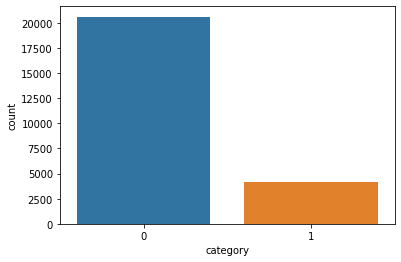

In [ ]:
sns.countplot(davidson_df.category)

## CONAN Dataset

In [ ]:
from google.colab import files
uploaded = files.upload() # Upload dataset csv local file from GitHub (official source: https://paperswithcode.com/dataset/conan)

Saving CONAN.csv to CONAN.csv


In [ ]:
conan_df = pd.read_csv('CONAN.csv') # Read the dataset
conan_df.head(10) # Show the first 10 records of the dataset 

,INDEX,HATE_SPEECH,COUNTER_NARRATIVE,TARGET,VERSION
0,0,Maybe the UN could talk to those asian and afr...,"You're right, ocean pollution is one of the ma...",other,V1
1,1,‘Juice (Jews) are worse that nukes.’ Caption t...,You'd rather be nuked then?,JEWS,V1
2,2,Foreigners on UK benefits leaps 41% in 5 years...,You seem to be worried about government expend...,MIGRANTS,V1
3,3,"Jews cannot be patriots, since their allegianc...",You can have parents and grandparents born els...,JEWS,V1
4,4,"Israel, Zionism and Jewish Supremacist control...",Wouldn't you say its colonialism from many dif...,JEWS,V1
5,5,"Women are basically childlike, they remain thi...",Would you say the same thing to the women who ...,WOMEN,V1
6,6,Foreigners on UK benefits leaps 41% in 5 years...,"Would be intersting to see how much money ""for...",MIGRANTS,V1
7,7,"Race is a social construct, and if you see any...","Women are women the world over, full stop.",POC,V1
8,8,Who the fuck are you? We are gutful sick of Va...,Without women there would be no men.,WOMEN,V1
9,9,"Women are basically childlike, they remain thi...",WIthout softeness and emotions there would jus...,WOMEN,V1


In [ ]:
conan_df.describe() # Show basic statistics

,INDEX
count,"5,003"
mean,"2,501"
std,"1,444"
min,0
25%,"1,250"
50%,"2,501"
75%,"3,752"
max,"5,002"


In [ ]:
conan_df.info() # Basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003 entries, 0 to 5002
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   INDEX              5003 non-null   int64 
 1   HATE_SPEECH        5003 non-null   object
 2   COUNTER_NARRATIVE  5003 non-null   object
 3   TARGET             5003 non-null   object
 4   VERSION            5003 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.6+ KB


In [ ]:
conan_df.shape # Dimensionality of the dataset

(5003, 5)

In [ ]:
conan_df['target'] = 1 # Set 1 to column target as all coments are hate speech in this dataset
conan_df = conan_df[['HATE_SPEECH', 'target']] # Keep the columns HATE_SPEECH and target that are necessary for our analysis
conan_df = conan_df.rename(columns= {'HATE_SPEECH' : 'comment', 'target':'category'}) # Rename the two columns
conan_df.head(10) # Show the first 10 records of the dataset 

,comment,category
0,Maybe the UN could talk to those asian and afr...,1
1,‘Juice (Jews) are worse that nukes.’ Caption t...,1
2,Foreigners on UK benefits leaps 41% in 5 years...,1
3,"Jews cannot be patriots, since their allegianc...",1
4,"Israel, Zionism and Jewish Supremacist control...",1
5,"Women are basically childlike, they remain thi...",1
6,Foreigners on UK benefits leaps 41% in 5 years...,1
7,"Race is a social construct, and if you see any...",1
8,Who the fuck are you? We are gutful sick of Va...,1
9,"Women are basically childlike, they remain thi...",1


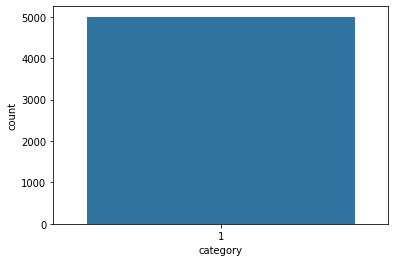

In [ ]:
sns.countplot(conan_df.category) # Countplot for the count of category column

## Concatenation

* Merge the above datasets for the analysis

In [ ]:
merged_df = pd.concat([berkeley_df, df_ethos_final, ICWSM18_df, jigsaw_df, davidson_df, conan_df])
merged_df

,comment,category
0,Yes indeed. She sort of reminds me of the elde...,0
15,Ladies buy a gun learn how to use it effective...,0
34,You are an amazing dad! Don't forget that girl...,0
70,@Ali Delon Love Turkey and brave Turks from In...,0
118,"Here's the thing, there is only one person on ...",0
...,...,...
4998,Woman are basically childlike.,1
4999,women should be submissive to men.,1
5000,"Women are essentially childlike, unable to und...",1
5001,Women should be submissive to men.,1


In [ ]:
print(f'The dimensionality of the merged dataset is: {merged_df.shape}')

The dimensionality of the merged dataset is: (2265516, 2)


In [ ]:
merged_df.to_csv('final_df.csv', index=False, header=True) # Create csv file with the final merged dataset 
files.download('final_df.csv') # Download the merged dataset

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Cleaning

* Create functions that removes unnecessary characters, symbols etc from the comments 

In [ ]:
def clean_comments(comment):
  if not isinstance(comment, str): # Cast comment in order to use lower() method
    return 'Remove the comment'
  to_lower = comment.lower() # Transform into lower case
  remove_mentions_emails = re.sub('[^ ]?@[^ ]*', '', to_lower) # Remove mentions and e-mails
  urls= re.compile(r'https?://\S+|www\.\S+') # Find all urls
  remove_urls = urls.sub(r'', remove_mentions_emails) # Remove urls
  remove_num = re.sub('[0-9]', '', remove_urls) # Remove numerics
  remove_punctuations = re.sub('[^a-zA-Z ]*', '', remove_num) # Remove punctuations
  remove_spaces = re.sub(' +', ' ', remove_punctuations).strip() # Removes useless spaces 
  remove_rts = re.sub(' rt ', ' ', remove_spaces) # Remove rt words
  split_comment = remove_rts.split(' ', 1)
  if split_comment[0] == 'rt': # Remove rt words that appear as first words
    try: # Try - catch block with exception IndexError for comments that need to be removed
      clean_com = split_comment[1]
    except IndexError:
      clean_com = 'Remove the comment'
  else:
    clean_com = remove_rts
  return clean_com # Return the cleaned comment
# Apply in column comment the above comments
merged_df['comment'] = merged_df['comment'].apply(lambda x: clean_comments(x))
merged_df['comment'] = merged_df['comment'].replace('amp','&', regex=True) # Replace amp encoded characters with symbol &
merged_df = merged_df[merged_df['comment'] != 'Remove the comment']
# Function that removes repeated characters
def repetition(comment):
    return re.sub("(.)\\1{3,}", "\\1", comment)
merged_df['comment']= merged_df['comment'].apply(repetition)
merged_df.head(10) # Show the first 10 records of the dataset

,comment,category
0,yes indeed she sort of reminds me of the elder...,0
15,ladies buy a gun learn how to use it effective...,0
34,you are an amazing dad dont forget that girls ...,0
70,delon love turkey and brave turks from indian ...,0
118,heres the thing there is only one person on ea...,0
128,hey there due to my college transiconnotch bei...,0
147,all children should be respected in schools ev...,0
164,i think youre a bit confused if youre an lgbt ...,0
188,its not your decision if a woman doesnt want t...,0
204,we oppose any restriction to human services an...,0


In [ ]:
merged_df.to_csv('final_cleaned_df.csv', index=False, header=True) # Create csv file with the final cleaned dataset
files.download('final_cleaned_df.csv') # Download the final cleaned dataset

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The final dataset `final_cleaned_df.csv` will be analyzed in the next notebook  `2. EDA Text Analysis`.